In [29]:
import torch
import random
from torch import nn
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import TwoSlopeNorm

In [30]:
def get_device():
    if torch.cuda.is_available():
        return "cuda"
    elif torch.backends.mps.is_available():
        return "mps"
    else:
        return "cpu"

device = get_device()
print(f"Using {device} device")

Using mps device


In [40]:
class ToyModel(nn.Module):
    def __init__(self, m, n, include_ReLU):
        '''Create a toy model

        Args:
            m (int): the number of neurons (as described in original paper)
            n (int): the number of features the Toy model can map.
            (The weight matrix is delcared to be m * n)

            include_ReLU (bool): if True, a nonlinearity is added to the network
        '''
        super().__init__()
        self.weights = nn.Parameter(torch.randn(m, n), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(n, 1), requires_grad=True)
        self.ReLU = nn.ReLU(inplace=True)
        self.inclue_ReLU = include_ReLU
        
    def forward(self, x): # x is 5 * 1
        hidden = self.weights @ x
        final = self.weights.T @ hidden
        final += self.bias
        if self.inclue_ReLU:
            return self.ReLU(final)
        else:
            return final

class ImporanceWeightedMSE(nn.Module):
    def __init__(self):
        super(ImporanceWeightedMSE, self).__init__()

    def forward(self, predictions, targets, importance):
        sub_total = ((predictions - targets)**2).sum(0).flatten()
        return sum(sub_total * importance)

In [41]:
def graph_weights(weights):
    w = weights.clone().detach()
    to_graph = w.T @ w
    colors = [(.4, 0, 1), (1, 1, 1), (1, .4, 0)]  # Purple -> White -> Orange
    n_bins = 100 
    cm = LinearSegmentedColormap.from_list("", colors, N=n_bins)
    
    norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
    
    plt.imshow(to_graph, cmap=cm, norm=norm)
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [42]:
m = ToyModel(5, 20, False)

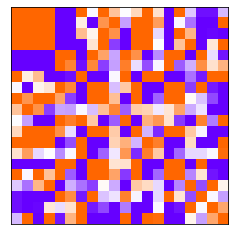

In [43]:
graph_weights(m.weights)

In [39]:
m.weights

Parameter containing:
tensor([[0.8681, 0.2192, 0.8177, 0.6633, 0.3221, 0.0217, 0.2746, 0.7589, 0.4455,
         0.8091, 0.8196, 0.9448, 0.5870, 0.0852, 0.3755, 0.3041, 0.9415, 0.7284,
         0.9474, 0.9627],
        [0.1431, 0.3742, 0.9390, 0.9399, 0.3058, 0.0674, 0.9456, 0.9885, 0.3286,
         0.4018, 0.7324, 0.1933, 0.9471, 0.0302, 0.4912, 0.2446, 0.8070, 0.3492,
         0.4636, 0.1797],
        [0.7711, 0.5619, 0.3902, 0.6500, 0.3674, 0.1448, 0.3264, 0.0899, 0.7724,
         0.7281, 0.4984, 0.4330, 0.5722, 0.6191, 0.7139, 0.3308, 0.2391, 0.7578,
         0.5828, 0.7618],
        [0.5426, 0.8700, 0.2486, 0.5180, 0.1603, 0.0349, 0.7188, 0.8283, 0.5123,
         0.9262, 0.5853, 0.1758, 0.9219, 0.6034, 0.8731, 0.1932, 0.1342, 0.8879,
         0.4352, 0.5642],
        [0.1642, 0.8164, 0.8416, 0.4919, 0.2435, 0.9843, 0.5854, 0.4844, 0.9259,
         0.8949, 0.0497, 0.4072, 0.0647, 0.1186, 0.4834, 0.2974, 0.6858, 0.5353,
         0.5421, 0.8249]], requires_grad=True)

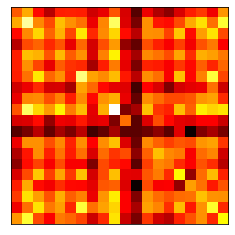

In [7]:
plt.imshow((m.weights.T @ m.weights).clone().detach(), cmap='hot', interpolation='nearest')
# plt.colorbar()  # optional, it adds a color bar to the side
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()


In [25]:
z = torch.zeros(20, 20)
for i in range(5):
    z[i][i] = 1

z[8][8] = -0.5
z[8][9] = -1

In [26]:
z.min()

tensor(-1.)

In [27]:
z.max()

tensor(1.)

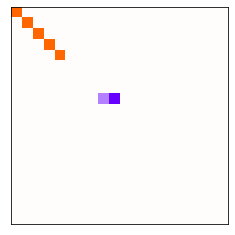

In [28]:


# Custom color map: Red for negative, White for zero, Blue for positive
colors = [(.4, 0, 1), (1, 1, 1), (1, .4, 0)]  # R -> W -> B
n_bins = 100  # Number of bins in the colormap
cmap_name = 'hello'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
# Creating the heatmap

norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

plt.imshow(z, cmap=cm, norm=norm)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()